In [11]:
import numpy as np
from numpy import nan
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import median


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [88]:
#https://github.com/NICTA/uncover-ml/blob/develop/preprocessing/raster_average.py
    
from numpy.lib.stride_tricks import as_strided
def filter_center(A, size=3, no_data_val=None, func=np.nanmean):
    """
    Parameters
    ----------
    A = input data
    size = odd number uniform filtering kernel size
    no_data_val = value in matrix that is treated as no data value
    func: function to use, choose from np.nanmean/median/max/min etc.
    Returns: nanmean of the matrix A filtered by a uniform kernel of size=size
    -------
    Adapted from: http://stackoverflow.com/questions/23829097/python-numpy-fastest-method-for-2d-kernel-rank-filtering-on-masked-arrays-and-o?rq=1
    Notes
    -----
    This function `centers` the kernel at the target pixel.
    This is slightly different from scipy.ndimage.uniform_filter application.
    In scipy.ndimage.uniform_filter, a convolution approach is implemented.
    An equivalent is scipy.ndimage.uniform_filter like convolution approach with
    no_data_val/nan handling can be found in filter_broadcast_uniform_filter in
    this module.
    Change function to nanmedian, nanmax, nanmin as required.
    """

    assert size % 2 == 1, 'Please supply an odd size'
    rows, cols = A.shape

    padded_A = np.empty(shape=(rows + size-1,
                               cols + size-1),
                        dtype=A.dtype)
    padded_A[:] = np.nan
    rows_pad, cols_pad = padded_A.shape

    if no_data_val:
        mask = A == no_data_val
        A[mask] = np.nan

    padded_A[size//2:rows_pad - size//2, size//2: cols_pad - size//2] = A.copy()

    N, M = A.shape

    B = as_strided(padded_A, (N, M, size, size),
                   padded_A.strides+padded_A.strides)
    B = B.copy().reshape((N, M, size**2))
    return func(B, axis=2)

In [99]:
img1=0.5*np.array([[-1.0, 1.2, 1.4, 1.6, 1.8],
                              [0.0, 1.2, 1.4, 1.6, 1.8],
                              [1.0, 1.2, 0.0, 1.6, 1.8],
                              [2.0, 1.2, 1.4, 1.6, 1.8],
                              [0.0, 1.2, 1.4, 1.6, 1.8]])

img1= 0.5*np.array([[nan, 1.2, 1.3, 1.4, 1.6],
                                            [nan, 1.2, 1.3, 1.4, 1.6],
                                            [1.0, 1.15, 1.23333333, 1.4, 1.625],
                                            [1.5, 1.32, 1.34285714, 1.4, 1.625],
                                            [1.5, 1.32, 1.34285714, 1.4,
                                             1.625]])


In [100]:
filter_center(img1, size=3, func=np.nanmedian)

array([[ 0.6       ,  0.625     ,  0.65      ,  0.7       ,  0.75      ],
       [ 0.5875    ,  0.6       ,  0.65      ,  0.7       ,  0.75      ],
       [ 0.6       ,  0.63333333,  0.66      ,  0.7       ,  0.75      ],
       [ 0.66      ,  0.66      ,  0.67142857,  0.7       ,  0.75625   ],
       [ 0.705     ,  0.67142857,  0.67142857,  0.7       ,  0.75625   ]])

In [96]:
img1=np.empty(shape=(5,5))*nan
img1[1,1] = 0
img1[1,3] = 0

In [101]:
img1

array([[        nan,  0.6       ,  0.65      ,  0.7       ,  0.8       ],
       [        nan,  0.6       ,  0.65      ,  0.7       ,  0.8       ],
       [ 0.5       ,  0.575     ,  0.61666667,  0.7       ,  0.8125    ],
       [ 0.75      ,  0.66      ,  0.67142857,  0.7       ,  0.8125    ],
       [ 0.75      ,  0.66      ,  0.67142857,  0.7       ,  0.8125    ]])

In [ ]:
(1.2)/2

In [75]:
img1

array([[ nan,  nan,  nan,  nan,  nan],
       [ nan,   0.,  nan,   0.,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan]])

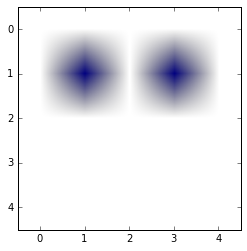

In [76]:
plt.imshow(img1)

In [78]:
mask = ~np.isnan(img1)
img1f = median(img1,disk(2), mask=mask)

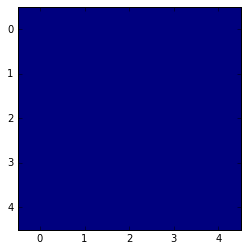

In [79]:
plt.imshow(img1f)

In [81]:
img1f, mask

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=uint8),
 array([[False, False, False, False, False],
        [False,  True, False,  True, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]], dtype=bool))

In [72]:
(1/256.0)*img1f

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])